## Imports

In [1]:
import numpy as np
from pysplinefit import data
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

## Generate a Test Case - Fit Sine

### Create the data

In [3]:
theta = np.linspace(0, 2 * np.pi, 100)
y = np.sin(theta)
z = np.zeros(len(theta))

### Plot data for illustraion

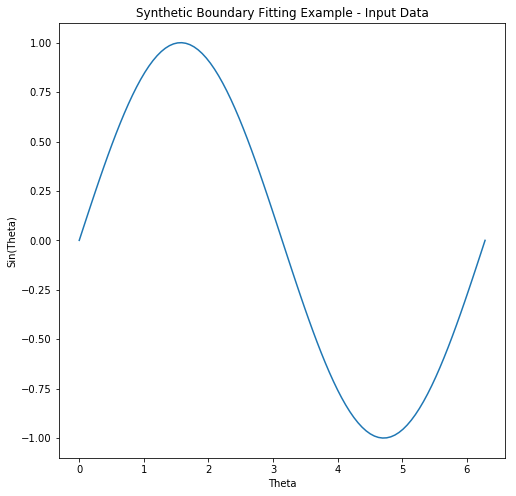

In [4]:
fig = plt.figure(figsize=(8, 8))
plt.plot(theta, y)
plt.xlabel('Theta')
plt.ylabel('Sin(Theta)')
plt.title('Synthetic Boundary Fitting Example - Input Data');

### Shuffle synthetic data so it has to be parameterized before fitting

In [5]:
# Make 2D array
input_data = np.column_stack((theta, y, z))

# Shuffle
np.random.shuffle(input_data)

## Instantiate an instance of the Boundary Class

In [6]:
# Set degree and number of control points
synthetic_bound = data.Boundary()
synthetic_bound.degree = 2
synthetic_bound.num_ctrlpts = 10

In [7]:
# Set input data and start/end points
synthetic_bound.data = input_data
synthetic_bound.start = np.array([0.0, np.sin(0.0), 0.0])
synthetic_bound.end = np.array([2 * np.pi, np.sin(2 * np.pi), 0.0])

## Create the initial curve and plot it with the data

In [8]:
synthetic_bound.set_init_curve()
init_curve_points = synthetic_bound.init_curve.points(np.linspace(0, 1))
init_curve_ctrlpts = synthetic_bound.init_curve.control_points

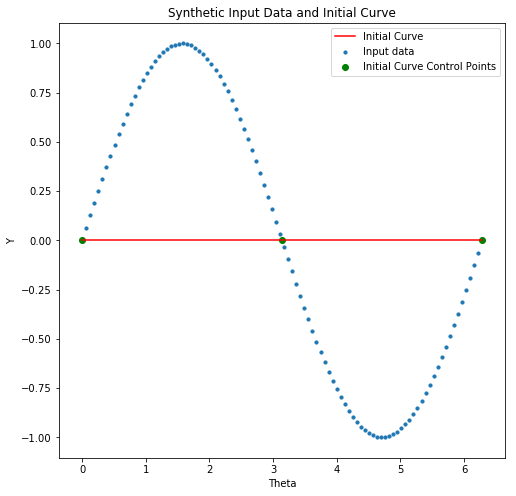

In [9]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(theta, y, s=10, label='Input data');
plt.plot(init_curve_points[:, 0], init_curve_points[:, 1], color='r', label='Initial Curve');
plt.scatter(init_curve_ctrlpts[:, 0], init_curve_ctrlpts[:, 1], color='g', label='Initial Curve Control Points')
plt.xlabel('Theta');
plt.ylabel('Y');
plt.title('Synthetic Input Data and Initial Curve');
plt.legend();

### Call fit - normal log level

In [10]:
synthetic_bound.fit()

Filling R Matrix
Checking partition of unity
Conditioning number of RTR: 7.247231270394886
Performing least squares
Performing uniform knot insertion
Filling R Matrix
Checking partition of unity
Conditioning number of RTR: 6.66011539882255
Performing least squares
Performing uniform knot insertion
Filling R Matrix
Checking partition of unity
Conditioning number of RTR: 9.587095160792634
Performing least squares
Performing uniform knot insertion
Filling R Matrix
Checking partition of unity
Conditioning number of RTR: 8.96036677480501
Performing least squares


### Plot results

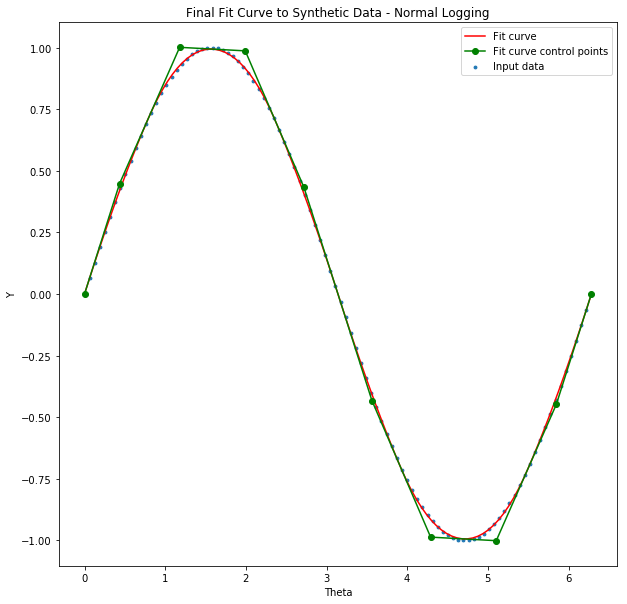

In [11]:
fit_points = synthetic_bound.fit_curve.points(np.linspace(0, 1, 100))
fit_ctrlpts = synthetic_bound.fit_curve.control_points

fig = plt.figure(figsize=(10,10))
plt.scatter(theta, y, s=8, label='Input data')
plt.plot(fit_points[:, 0], fit_points[:, 1], color='r', label='Fit curve');
plt.plot(fit_ctrlpts[:, 0], fit_ctrlpts[:, 1], color='g', marker='o', label='Fit curve control points')
plt.xlabel('Theta')
plt.ylabel('Y');
plt.legend()
plt.title('Final Fit Curve to Synthetic Data - Normal Logging');

### Call fit - quiet log level

In [12]:
synthetic_bound.fit(logging=-1)

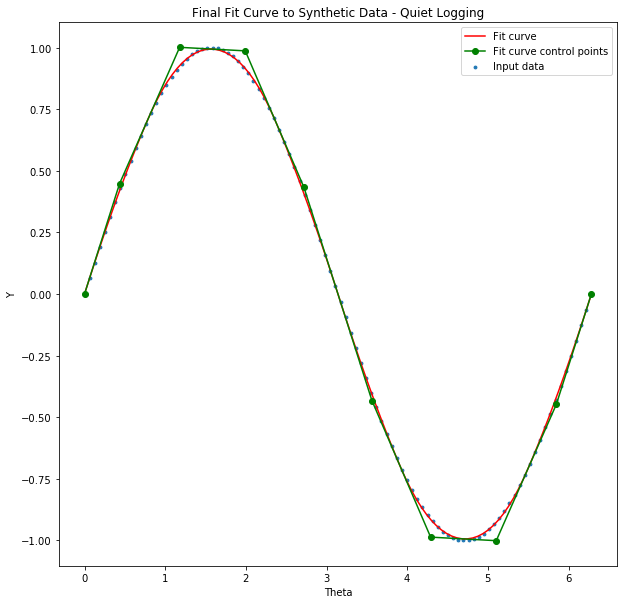

In [13]:
fit_points = synthetic_bound.fit_curve.points(np.linspace(0, 1, 100))
fit_ctrlpts = synthetic_bound.fit_curve.control_points

fig = plt.figure(figsize=(10,10))
plt.scatter(theta, y, s=8, label='Input data')
plt.plot(fit_points[:, 0], fit_points[:, 1], color='r', label='Fit curve');
plt.plot(fit_ctrlpts[:, 0], fit_ctrlpts[:, 1], color='g', marker='o', label='Fit curve control points')
plt.xlabel('Theta')
plt.ylabel('Y');
plt.legend()
plt.title('Final Fit Curve to Synthetic Data - Quiet Logging');

### Call fit - debug log level

In [14]:
synthetic_bound.fit(logging=4)

Filling R Matrix
Checking partition of unity
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Conditioning number of RTR: 7.247231270394886
Performing least squares
Performing uniform knot insertion
Inserting knot at 0.5
Filling R Matrix
Checking partition of unity
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Conditioning number of RTR: 6.66011539882255
Performing least squares
Performing uniform knot insertion
Inserting knot at 0.25
Inserting knot at 0.75
Filling R Matrix
Chec

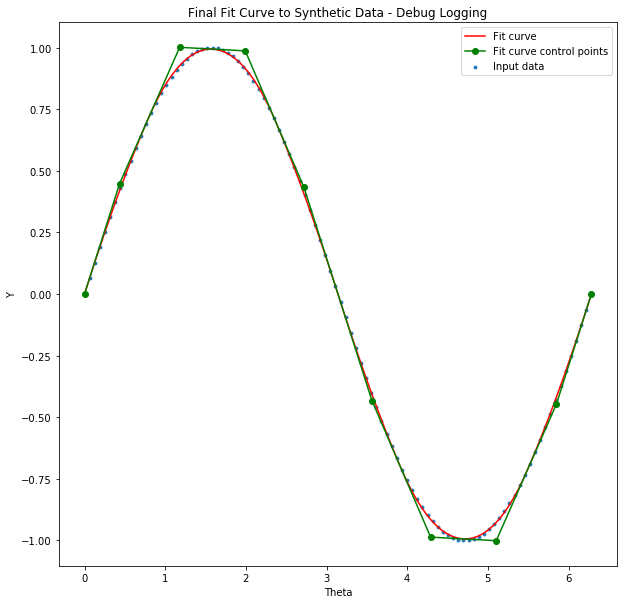

In [15]:
fit_points = synthetic_bound.fit_curve.points(np.linspace(0, 1, 100))
fit_ctrlpts = synthetic_bound.fit_curve.control_points

fig = plt.figure(figsize=(10,10))
plt.scatter(theta, y, s=8, label='Input data')
plt.plot(fit_points[:, 0], fit_points[:, 1], color='r', label='Fit curve');
plt.plot(fit_ctrlpts[:, 0], fit_ctrlpts[:, 1], color='g', marker='o', label='Fit curve control points')
plt.xlabel('Theta')
plt.ylabel('Y');
plt.legend()
plt.title('Final Fit Curve to Synthetic Data - Debug Logging');